### Student Information
Name:李碩元

Student ID:110065537

GitHub ID:renewrr

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

In [6]:
### Begin Assignment Here
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [52]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

data_amzn = pd.read_csv('./SentenceData/amazon_cells_labelled.txt', sep="\t", header=None)
data_amzn.columns = ["Sentence","Score"]
data_imdb = pd.read_csv('./SentenceData/imdb_labelled.txt', sep="  ", header=None)
data_imdb.columns = ["Sentence","Score"]
#Some irregularities in the seperation of sentence and score of imdb data set, chaning the seperator from tab to double spaces
data_yelp = pd.read_csv('./SentenceData/yelp_labelled.txt', sep="\t", header=None)
data_yelp.columns = ["Sentence","Score"]

C:\Users\Hilton\anaconda3\envs\Pytorch\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [53]:
print(data_imdb.shape,data_yelp.shape,data_amzn.shape)
#Confirms that all 1000 lines are loaded, the irregularities when loading data_imdb was discovered in this step

(1000, 2) (1000, 2) (1000, 2)


In [354]:
from sklearn.utils import shuffle

data_imdb['site'] = "IMDb"
data_amzn['site'] = "Amazon"
data_yelp['site'] = "Yelp"
data_comb = pd.concat([data_imdb,data_amzn,data_yelp])
data_comb = shuffle(data_comb,random_state=69)
data_comb.reset_index(inplace=True, drop=True)
data_comb.isnull().apply(lambda x: dmh.check_missing_values(x))
#No missing values confirms the datasets are correctly loaded

,Sentence,Score,site
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [59]:
print(sum(data_comb.duplicated()))
#some duplicated entries are found, investigate further

17


In [63]:
data_comb[data_comb.duplicated('Sentence',keep=False)]
#Most of the duplicates seems reasonable except 1260 and 1838, Ignore for now since its only one entry

,Sentence,Score,site
127,Great phone.,1,Amazon
217,The food was terrible.,0,Yelp
431,Great Phone.,1,Amazon
437,Great phone!.,1,Amazon
540,I would not recommend this place.,0,Yelp
542,Definitely worth checking out.,1,IMDb
746,This is a great deal.,1,Amazon
846,Not recommended.,0,IMDb
984,Works great!.,1,Amazon
1000,Don't buy this product.,0,Amazon


In [71]:
print(data_comb.Score.value_counts(),data_amzn.Score.value_counts(),data_imdb.Score.value_counts(),data_yelp.Score.value_counts())
#All three set has exactly half and half of positive and negative sentences, moving on to feature analysis

1    1500
0    1500
Name: Score, dtype: int64 0    500
1    500
Name: Score, dtype: int64 0    500
1    500
Name: Score, dtype: int64 1    500
0    500
Name: Score, dtype: int64


In [89]:
import nltk
import contractions

data_unigram = data_comb['Sentence'].apply(lambda x: dmh.tokenize_text(x))
count = 0
for d in data_unigram:
    for w in d:
        if(w == '.' or w == ','):
            count+=1
print(count)
#A lot of periods and commas was parsed with provided helper

3935


In [644]:
import helpers.data_mining_helpers_v2 as dmh2
data_unigram = data_comb['Sentence'].apply(lambda x: dmh2.tokenize_text(x))
count = 0
for d in data_unigram:
    for w in d:
        if(w == '.' or w == ','):
            count+=1
print("Number of \".\" or \",\" :",count)
#Unwanted tokens are filtered with modified helper

Number of "." or "," : 0


In [645]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_comb_counts = count_vect.fit_transform(data_comb.Sentence)
analyze = count_vect.build_analyzer()
print(analyze(data_comb['Sentence'][50]))
print(data_unigram[50])
#Seems like our unigram method generate similar result to the analyzer except we didn't filter out words like "a", 
#which with my intuition seems unimportant and can be discarded, we will use the analyzer result from now on

['the', 'case', 'is', 'flimsy', 'piece', 'of', 'plastic', 'and', 'has', 'no', 'front', 'or', 'side', 'protection', 'whatsoever']
['The', 'case', 'is', 'a', 'flimsy', 'piece', 'of', 'plastic', 'and', 'has', 'no', 'front', 'or', 'side', 'protection', 'whatsoever']


In [646]:
import numpy as np
import plotly.express as px

sums = sum(data_comb_counts)
sums = sums.toarray()[0]
esums = list(enumerate(sums))
esums.sort(key = lambda x:x[1],reverse=True)
f_names = tuple(count_vect.get_feature_names())
#Sort the occurence to see what kinds of word occur the most

C:\Users\Hilton\anaconda3\envs\Pytorch\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [347]:
esums_300 = esums[0:300]
esums_300_name = []
for e in esums_300:
    esums_300_name.append([f_names[e[0]],e[1]])
esums_300_name
fig = px.bar(esums_300_name, x=0, y=1,labels={"0":"Term","1":"Occurence"})
fig.show()

#Combined data doesn't show too much insight into the datasets, 
#generic adjectives like "great" or "very" are very common which is to be expected

In [348]:
count_vect = CountVectorizer()
data_amzn_counts = count_vect.fit_transform(data_amzn.Sentence)
analyze = count_vect.build_analyzer()
sums = sum(data_amzn_counts)
sums = sums.toarray()[0]
esums = list(enumerate(sums))
esums.sort(key = lambda x:x[1],reverse=True)
f_names = tuple(count_vect.get_feature_names())
esums_300 = esums[0:300]
esums_300_name = []
for e in esums_300:
    esums_300_name.append([f_names[e[0]],e[1]])
esums_300_name
fig = px.bar(esums_300_name, x=0, y=1,labels={"0":"Term","1":"Occurence"}, title="Amazon")
fig.show()

count_vect = CountVectorizer()
data_imdb_counts = count_vect.fit_transform(data_imdb.Sentence)
analyze = count_vect.build_analyzer()
sums = sum(data_imdb_counts)
sums = sums.toarray()[0]
esums = list(enumerate(sums))
esums.sort(key = lambda x:x[1],reverse=True)
f_names = tuple(count_vect.get_feature_names())
esums_300 = esums[0:300]
esums_300_name = []
for e in esums_300:
    esums_300_name.append([f_names[e[0]],e[1]])
esums_300_name
fig = px.bar(esums_300_name, x=0, y=1,labels={"0":"Term","1":"Occurence"}, title="IMDb")
fig.show()

count_yelp = CountVectorizer()
data_yelp_counts = count_vect.fit_transform(data_yelp.Sentence)
analyze = count_vect.build_analyzer()
sums = sum(data_yelp_counts)
sums = sums.toarray()[0]
esums = list(enumerate(sums))
esums.sort(key = lambda x:x[1],reverse=True)
f_names = tuple(count_vect.get_feature_names())
esums_300 = esums[0:300]
esums_300_name = []
for e in esums_300:
    esums_300_name.append([f_names[e[0]],e[1]])
esums_300_name
fig = px.bar(esums_300_name, x=0, y=1,labels={"0":"Term","1":"Occurence"},title="Yelp")
fig.show()

#Amazon dataset has a lot of metions about phones, headsets and battery
#IMDb dataset does not have much surprises with phrases like movie,plot,character,story etc.
#Yelp dataset also has phrases that are to be expected such as food, service, friendly.

In [533]:
import matplotlib.pyplot as plt
%matplotlib inline
print(data_amzn_counts.shape)
from sklearn.decomposition import PCA
data_amzn_reduced = PCA(n_components = 2).fit_transform(data_amzn_counts.toarray())
print(data_amzn_reduced.shape)

(1000, 1847)
(1000, 2)


In [534]:
data_imdb_reduced = PCA(n_components = 2).fit_transform(data_imdb_counts.toarray())
data_yelp_reduced = PCA(n_components = 2).fit_transform(data_yelp_counts.toarray())

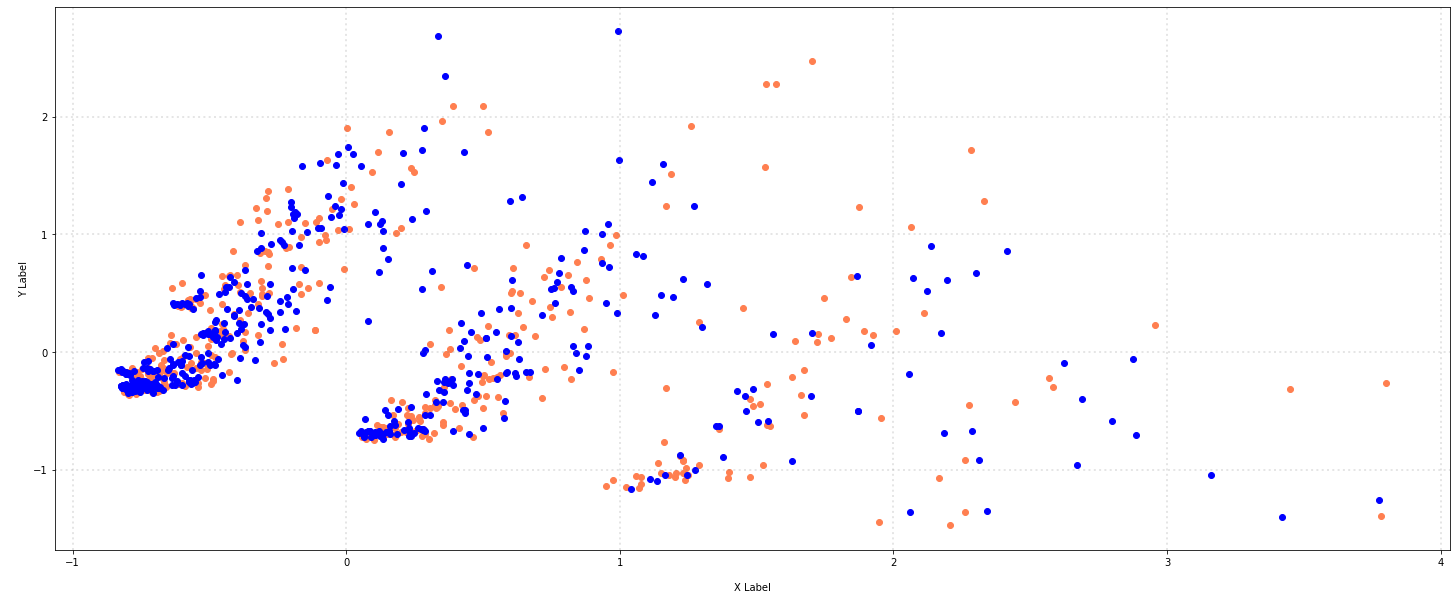

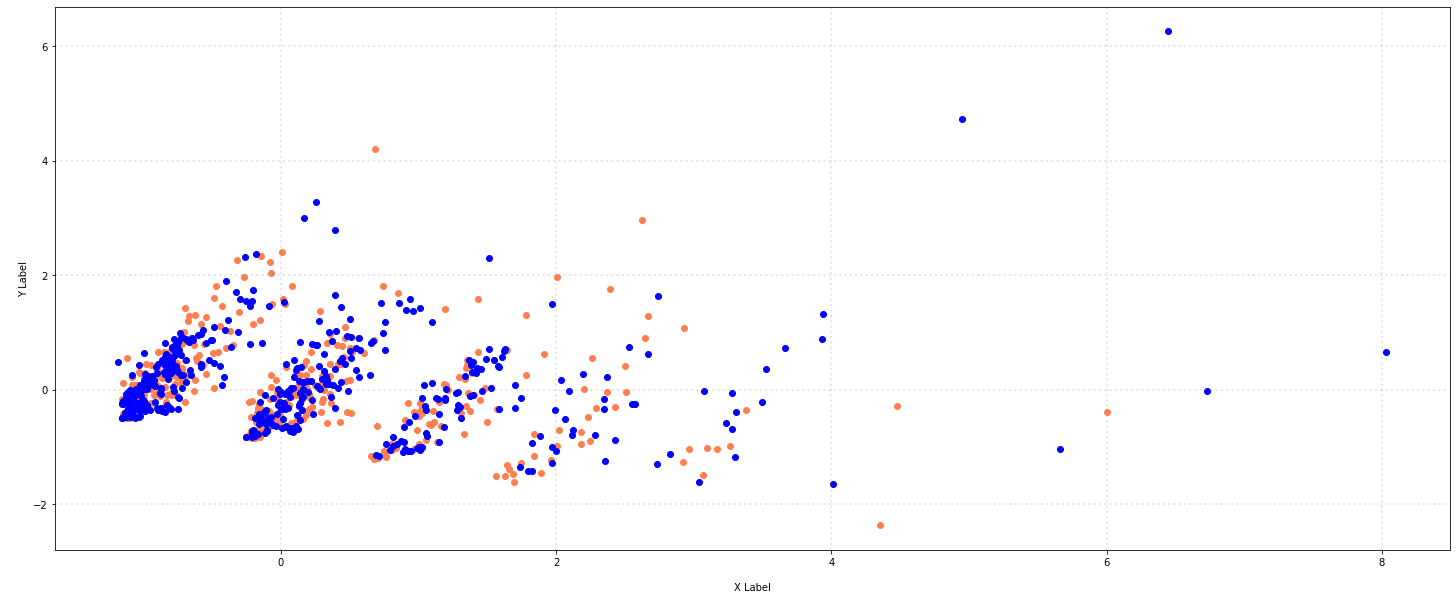

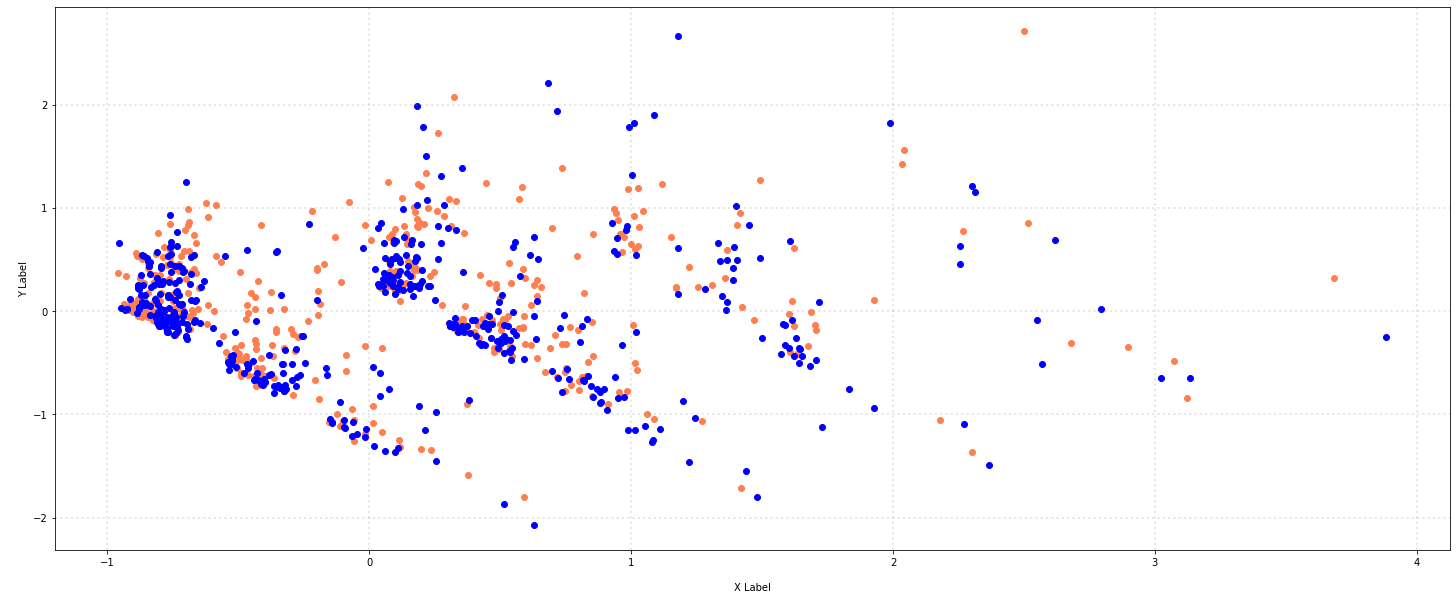

In [535]:
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
col = ['coral', 'blue', 'black', 'm']
categories = [0,1]
for c, category in zip(col, categories):
    xs = data_amzn_reduced[data_amzn['Score'] == category].T[0]
    ys = data_amzn_reduced[data_amzn['Score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.show()

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
col = ['coral', 'blue', 'black', 'm']
categories = [0,1]
for c, category in zip(col, categories):
    xs = data_imdb_reduced[data_imdb['Score'] == category].T[0]
    ys = data_imdb_reduced[data_imdb['Score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.show()

fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
col = ['coral', 'blue', 'black', 'm']
categories = [0,1]
for c, category in zip(col, categories):
    xs = data_yelp_reduced[data_yelp['Score'] == category].T[0]
    ys = data_yelp_reduced[data_yelp['Score'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
plt.show()

#All three dataset seems to display multiple clusters of data, if in the future we are to do further analysis, I would start by
#using k-means clustering to see what kind of comments are grouped together

In [538]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import binarize

dfcomb = pd.DataFrame(data_comb_counts.todense())
amzn_counts = binarize(dfcomb[data_comb['site'] == "Amazon"])
yelp_counts = binarize(dfcomb[data_comb['site'] == "Yelp"])
imdb_counts = binarize(dfcomb[data_comb['site'] == "IMDb"])


In [539]:
#Calculate cosine similarity between comments of the same website
total = 0
for i in range(1000):
    total += sum(cosine_similarity(amzn_counts[i].reshape(1, -1), amzn_counts, dense_output=True)[0])
print("Amazon-Amazon:",total/1000000)

total = 0
for i in range(1000):
    total += sum(cosine_similarity(imdb_counts[i].reshape(1, -1), imdb_counts, dense_output=True)[0])
print("IMDb-IMDb:",total/1000000)

total = 0
for i in range(1000):
    total += sum(cosine_similarity(yelp_counts[i].reshape(1, -1), yelp_counts, dense_output=True)[0])
print("Yelp-Yelp:",total/1000000)
#Average cosine similarity suggest imdb comments are more similar to each other in general, with Yelp comments comming in second in similarity

Amazon-Amazon: 0.061258699739246775
IMDb-IMDb: 0.08246957406463408
Yelp-Yelp: 0.06850493273163633


In [332]:
#Calculate cosine similarity between comments of two websites
total = 0
for i in range(1000):
    total += sum(cosine_similarity(amzn_counts[i].reshape(1, -1), imdb_counts, dense_output=True)[0])
print("Amazon-Imdb:",total/1000000)

total = 0
for i in range(1000):
    total += sum(cosine_similarity(imdb_counts[i].reshape(1, -1), yelp_counts, dense_output=True)[0])
print("IMDb-Yelp:",total/1000000)

total = 0
for i in range(1000):
    total += sum(cosine_similarity(yelp_counts[i].reshape(1, -1), amzn_counts, dense_output=True)[0])
print("Yelp-Amazon:",total/1000000)

Amazon-Imdb: 0.06032405494342707
IMDb-Yelp: 0.06282735809167637
Yelp-Amazon: 0.05337295837260573


In [373]:
amzn_pos_counts = binarize(dfcomb[(data_comb['site'] == "Amazon") & (data_comb['Score'] == 1)])
amzn_neg_counts = binarize(dfcomb[(data_comb['site'] == "Amazon") & (data_comb['Score'] == 0)])
imdb_pos_counts = binarize(dfcomb[(data_comb['site'] == "IMDb") & (data_comb['Score'] == 1)])
imdb_neg_counts = binarize(dfcomb[(data_comb['site'] == "IMDb") & (data_comb['Score'] == 0)])
yelp_pos_counts = binarize(dfcomb[(data_comb['site'] == "Yelp") & (data_comb['Score'] == 1)])
yelp_neg_counts = binarize(dfcomb[(data_comb['site'] == "Yelp") & (data_comb['Score'] == 0)])

In [376]:
#Calculate cosine similarity between comments of the same website and seperate by positive or negative
total = 0
for i in range(500):
    total += sum(cosine_similarity(amzn_pos_counts[i].reshape(1, -1), amzn_neg_counts, dense_output=True)[0])
print("Amazon-Pos-Neg:",total/250000)

total = 0
for i in range(500):
    total += sum(cosine_similarity(imdb_pos_counts[i].reshape(1, -1), imdb_neg_counts, dense_output=True)[0])
print("IMDb-Pos-Neg:",total/250000)

total = 0
for i in range(500):
    total += sum(cosine_similarity(yelp_pos_counts[i].reshape(1, -1), yelp_neg_counts, dense_output=True)[0])
print("Yelp-Pos-Neg:",total/250000)

total = 0
for i in range(500):
    total += sum(cosine_similarity(amzn_pos_counts[i].reshape(1, -1), amzn_pos_counts, dense_output=True)[0])
print("Amazon-Pos-Pos:",total/250000)

total = 0
for i in range(500):
    total += sum(cosine_similarity(imdb_pos_counts[i].reshape(1, -1), imdb_pos_counts, dense_output=True)[0])
print("IMDb-Pos-Pos:",total/250000)

total = 0
for i in range(500):
    total += sum(cosine_similarity(yelp_pos_counts[i].reshape(1, -1), yelp_pos_counts, dense_output=True)[0])
print("Yelp-Pos-Pos:",total/250000)

total = 0
for i in range(500):
    total += sum(cosine_similarity(amzn_neg_counts[i].reshape(1, -1), amzn_neg_counts, dense_output=True)[0])
print("Amazon-Neg-Neg:",total/250000)

total = 0
for i in range(500):
    total += sum(cosine_similarity(imdb_neg_counts[i].reshape(1, -1), imdb_neg_counts, dense_output=True)[0])
print("IMDb-Neg-Neg:",total/250000)

total = 0
for i in range(500):
    total += sum(cosine_similarity(yelp_neg_counts[i].reshape(1, -1), yelp_neg_counts, dense_output=True)[0])
print("Yelp-Neg-Neg:",total/250000)

#Continuing the trend, IMDb comments have very high similarities between each other even between positive and negative comments
#We can see that in general positive comments from the same site are very similar, but negative comments are in general more diversed

Amazon-Pos-Neg: 0.05498110727906859
IMDb-Pos-Neg: 0.07969671149876223
Yelp-Pos-Neg: 0.0641472313517469
Amazon-Pos-Pos: 0.07491919172744105
IMDb-Pos-Pos: 0.087098866084007
Yelp-Pos-Pos: 0.07818076189259787
Amazon-Neg-Neg: 0.06015339267140872
IMDb-Neg-Neg: 0.08338600717700462
Yelp-Neg-Neg: 0.06754450633045364


In [378]:
#Calculate cosine similarity between comments of two websites and seperate by positive and negative
total = 0
for i in range(500):
    total += sum(cosine_similarity(amzn_pos_counts[i].reshape(1, -1), imdb_pos_counts, dense_output=True)[0])
print("Amazon-IMDb-Pos-Pos:",total/250000)

total = 0
for i in range(500):
    total += sum(cosine_similarity(imdb_pos_counts[i].reshape(1, -1), yelp_pos_counts, dense_output=True)[0])
print("IMDb-Yelp-Pos-Pos:",total/250000)

total = 0
for i in range(500):
    total += sum(cosine_similarity(yelp_pos_counts[i].reshape(1, -1), amzn_pos_counts, dense_output=True)[0])
print("Yelp-Amazon-Pos-Pos:",total/250000)


total = 0
for i in range(500):
    total += sum(cosine_similarity(amzn_neg_counts[i].reshape(1, -1), imdb_neg_counts, dense_output=True)[0])
print("Amazon-IMDb-Neg-Neg:",total/250000)

total = 0
for i in range(500):
    total += sum(cosine_similarity(imdb_neg_counts[i].reshape(1, -1), yelp_neg_counts, dense_output=True)[0])
print("IMDb-Yelp-Neg-Neg:",total/250000)

total = 0
for i in range(500):
    total += sum(cosine_similarity(yelp_neg_counts[i].reshape(1, -1), amzn_neg_counts, dense_output=True)[0])
print("Yelp-Amazon-Neg-Neg:",total/250000)

#All three pairs have higher similarites in positive comments,
#this result and the previous suggests that we use more diversed vocabulary to describe negative experiences

Amazon-IMDb-Pos-Pos: 0.06374046288252982
IMDb-Yelp-Pos-Pos: 0.06667496843836189
Yelp-Amazon-Pos-Pos: 0.06063579392942567
Amazon-IMDb-Neg-Neg: 0.06016871222777751
IMDb-Yelp-Neg-Neg: 0.06153820861557452
Yelp-Amazon-Neg-Neg: 0.052784763161054134


In [540]:
#As the cluster graph showed, each website has some cluster of sentences,
#we will try to use k-means clustering to seperate these clusters
#We will use the amazon dataset for testing

from sklearn.cluster import KMeans


In [541]:
k_means = KMeans(n_clusters = 10)
k_means.fit(data_amzn_reduced)

KMeans(n_clusters=10)

In [547]:
from collections import Counter
labels = k_means.predict(data_amzn_reduced)
labels_count = dict(Counter(labels))
labels_count_list = []
for key in labels_count:
    labels_count_list.append([key,labels_count[key]])
labels_count_list.sort(key = lambda x:x[1],reverse=True)
fig = px.bar(labels_count_list, x=0, y=1,labels={"0":"Group","1":"Count"})
fig.show()
#We choose Group 0,4,8,6,9 and discard the rest for now, since they present 80% of all data(806 out of 1000)

In [548]:
centroids = k_means.cluster_centers_
colors = ['coral', 'blue', 'black', 'm','r','g','b','lime','indigo','orange']
chosen = [0,4,8,6,9]
amzn_kmeans = pd.DataFrame(data_amzn_reduced)


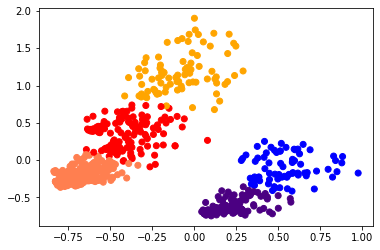

In [549]:
chosen_idx = []
for label in labels:
    if(label in chosen):
        chosen_idx.append(True)
    else:
        chosen_idx.append(False)
cmap = map(lambda x: colors[x],labels[chosen_idx])
plt.scatter(amzn_kmeans[chosen_idx][0],amzn_kmeans[chosen_idx][1],color = list(cmap))
#Now we have our groups, we can see what each group contains

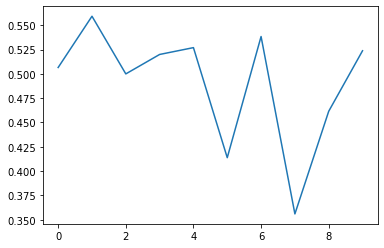

In [552]:
#Now we see how positive/negative are each group
all_sums = []
for i in range(10):
    all_sums.append(sum(data_amzn[labels == i]['Score']/len(data_amzn[labels == i])))
plt.plot(all_sums)

In [558]:
#As the plot shows, we find 2 groups that are particularly negative, which are group 5 and 7, try to print some sentences from group 7
data_amzn[labels == 7][::3]
#the sentences confirms that there are indeed a higher proportion of negative comments, but this method fails to capture meaningful
#way of grouping positive comments since the most positive of all groups only has around 55% positive comments and most of the big groups

,Sentence,Score,site
11,He was very impressed when going from the orig...,1,Amazon
22,The commercials are the most misleading.,0,Amazon
47,AFTER ARGUING WITH VERIZON REGARDING THE DROPP...,0,Amazon
87,The construction of the headsets is poor.,0,Amazon
169,One thing I hate is the mode set button at the...,0,Amazon
203,The best electronics of the available FM Trans...,1,Amazon
296,"Works great, when my cat attacked the phone he...",1,Amazon
385,The worst piece of crap ever along with the Ve...,0,Amazon
445,"I searched the Internet, and found this one to...",1,Amazon
488,"Then I exchanged for the same phone, even that...",0,Amazon


In [637]:
#TF-ID features and naive-bayes classifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(list(data_comb.Sentence))
tfid_words = vectorizer.get_feature_names_out()
print(len(tfid_words))
print(X.shape)

5155
(3000, 5155)


In [638]:
NBC = MultinomialNB()
NBC.fit(X, data_comb.Score)

MultinomialNB()

In [649]:
from sklearn import metrics
predicted = NBC.predict(X)
acc = metrics.accuracy_score(data_comb.Score, predicted)
print("Acc ",acc)

print(metrics.classification_report(data_comb.Score, predicted,target_names=['Positive', 'Negative']))

#With the simplest approach of using the whole dataset as training and testing set, we achieve a 95% accuracy
#To futher test this method, we will next split the data into training and testing sets and do the whole process again
#to see if we can achieve similar results

Acc  0.953
              precision    recall  f1-score   support

    Positive       0.94      0.97      0.95      1500
    Negative       0.97      0.93      0.95      1500

    accuracy                           0.95      3000
   macro avg       0.95      0.95      0.95      3000
weighted avg       0.95      0.95      0.95      3000



In [650]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_comb.Sentence, data_comb.Score, test_size=1/3, random_state=69420)
vectorizer2 = TfidfVectorizer()
X2 = vectorizer2.fit_transform(X_train)
tfid_words = vectorizer.get_feature_names_out()
NBC2 = MultinomialNB()
NBC2.fit(X2, y_train)

MultinomialNB()

In [651]:
X2_test = vectorizer2.transform(X_test)
predicted2 = NBC2.predict(X2_test)
acc2 = metrics.accuracy_score(y_test, predicted2)
print("Acc_test_train_seperated ",acc2)

print(metrics.classification_report(y_test, predicted2,target_names=['Positive', 'Negative']))

#As expected, the result won't be as good since the model can't "memorize" all 3000 rows, but still the results are
#quite good for such a simple model with almost 80% accuracy

Acc_test_train_seperated  0.797
              precision    recall  f1-score   support

    Positive       0.79      0.81      0.80       496
    Negative       0.81      0.78      0.80       504

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



In [652]:
X_train, X_test, y_train, y_test = train_test_split(data_comb.Sentence, data_comb.Score, test_size=1/3, random_state=69420)
vectorizer3 = CountVectorizer()
X3 = vectorizer3.fit_transform(X_train)
NBC3 = MultinomialNB()
NBC3.fit(X3, y_train)

MultinomialNB()

In [653]:
X3_test = vectorizer3.transform(X_test)
predicted3 = NBC3.predict(X3_test)
acc3 = metrics.accuracy_score(y_test, predicted3)
print("Acc_test_train_seperated ",acc3)

print(metrics.classification_report(y_test, predicted3,target_names=['Positive', 'Negative']))

#The result with word frequency vectorizer is on par with or even slightly better than the model using Tf–idf vectorizer, which is a bit 
#suprising since the methodology of Tf-idf should in theory make phrases that distinguish different classes more pronounce,
#which should give a better result.
#My intuition is that with only 2 classes the task is not complex enough for the benefit of Tf-idf to show
#Should the test be to both classify the positivity and website, TF-idf should have better performance

Acc_test_train_seperated  0.807
              precision    recall  f1-score   support

    Positive       0.80      0.82      0.81       496
    Negative       0.82      0.80      0.81       504

    accuracy                           0.81      1000
   macro avg       0.81      0.81      0.81      1000
weighted avg       0.81      0.81      0.81      1000



In [663]:
data_comb_v2 = data_comb
data_comb_v2['target'] = data_comb_v2['Score'].astype(str)+data_comb_v2['site']
X_train, X_test, y_train, y_test = train_test_split(data_comb_v2.Sentence, data_comb_v2.target, test_size=1/3, random_state=69420)

In [665]:
vectorizer2 = TfidfVectorizer()
X2 = vectorizer2.fit_transform(X_train)
tfid_words = vectorizer.get_feature_names_out()
NBC2 = MultinomialNB()
NBC2.fit(X2, y_train)
X2_test = vectorizer2.transform(X_test)
predicted2 = NBC2.predict(X2_test)
acc2 = metrics.accuracy_score(y_test, predicted2)
print("Acc_test_train_seperated ",acc2)
print(metrics.classification_report(y_test, predicted2,target_names=['P_amzn', 'N_amzn','P_imdb', 'N_imdb','P_yelp', 'N_yelp']))


Acc_test_train_seperated  0.666
              precision    recall  f1-score   support

      P_amzn       0.63      0.55      0.59       160
      N_amzn       0.63      0.66      0.65       171
      P_imdb       0.58      0.60      0.59       165
      N_imdb       0.76      0.75      0.75       177
      P_yelp       0.71      0.71      0.71       170
      N_yelp       0.67      0.73      0.70       157

    accuracy                           0.67      1000
   macro avg       0.66      0.66      0.66      1000
weighted avg       0.67      0.67      0.67      1000



In [669]:
X_train, X_test, y_train, y_test = train_test_split(data_comb_v2.Sentence, data_comb_v2.target, test_size=1/3, random_state=69420)
vectorizer3 = CountVectorizer()
X3 = vectorizer3.fit_transform(X_train)
NBC3 = MultinomialNB()
NBC3.fit(X3, y_train)
X3_test = vectorizer3.transform(X_test)
predicted3 = NBC3.predict(X3_test)
acc3 = metrics.accuracy_score(y_test, predicted3)
print("Acc_test_train_seperated ",acc3)
print(metrics.classification_report(y_test, predicted3,target_names=['P_amzn', 'N_amzn','P_imdb', 'N_imdb','P_yelp', 'N_yelp']))

#The result suggests my intuition was incorrect, the 2 vectorizer still performs about equal.
#My next intuition is that if the 2 method has similar result, the idf part of Tf-idf might not be very relevant
#in this case, but currently I've ran out of ideas to test this theory.

Acc_test_train_seperated  0.677
              precision    recall  f1-score   support

      P_amzn       0.69      0.51      0.59       160
      N_amzn       0.65      0.66      0.65       171
      P_imdb       0.60      0.67      0.63       165
      N_imdb       0.74      0.77      0.76       177
      P_yelp       0.67      0.74      0.70       170
      N_yelp       0.73      0.71      0.72       157

    accuracy                           0.68      1000
   macro avg       0.68      0.68      0.67      1000
weighted avg       0.68      0.68      0.68      1000

